# Spaceship Titanic
### Juan Camilo Huizinga Mora

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

url = 'train.csv'
url2 = 'test.csv'
df = pd.read_csv(url)
test_df = pd.read_csv(url2)
df.columns = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']

df.head()
#Even verkennen

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Hoeveel nul waardes?
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.fillna(method='pad', inplace=True)
#Alle null values worden nu vervangen door de vorige value in de column.

In [6]:
df.isnull().sum()
#Alle null values zijn opgelost

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [7]:
df.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck', 'Cabin', 'Name'], axis=1, inplace=True)
#Deze colommen hebben denk ik niet veel toe te voegen en hebben veel null waardes, daarom verwijderen

In [8]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True


In [9]:
df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0})
df['VIP'] = df['VIP'].map({True: 1, False: 0})
df['Transported'] = df['Transported'].map({True: 1, False: 0})
df['Destination'] = df['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})
df['HomePlanet'] = df['HomePlanet'].map({'Europa': 0, 'Earth': 1, 'Mars': 2})

In [10]:
df['CryoSleep'] = pd.to_numeric(df['CryoSleep'])
df['VIP'] = pd.to_numeric(df['VIP'])
df['Transported'] = pd.to_numeric(df['Transported'])
df['Destination'] = pd.to_numeric(df['Destination'])
df['HomePlanet'] = pd.to_numeric(df['HomePlanet'])
df['Age'] = pd.to_numeric(df['Age'])

## Test data aanpassen

In [11]:
test_df.fillna(method='pad', inplace=True)

In [12]:
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [13]:
test_df.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck', 'Cabin', 'Name'], axis=1, inplace=True)
#Deze colommen hebben denk ik niet veel toe te voegen en hebben veel null waardes, daarom verwijderen

In [14]:
test_df['CryoSleep'] = test_df['CryoSleep'].map({True: 1, False: 0})
test_df['VIP'] = test_df['VIP'].map({True: 1, False: 0})
test_df['Destination'] = test_df['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})
test_df['HomePlanet'] = test_df['HomePlanet'].map({'Europa': 0, 'Earth': 1, 'Mars': 2})

In [15]:
test_df['CryoSleep'] = pd.to_numeric(test_df['CryoSleep'])
test_df['VIP'] = pd.to_numeric(test_df['VIP'])
test_df['Destination'] = pd.to_numeric(test_df['Destination'])
test_df['HomePlanet'] = pd.to_numeric(test_df['HomePlanet'])
test_df['Age'] = pd.to_numeric(test_df['Age'])

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4277 non-null   object 
 1   HomePlanet   4277 non-null   int64  
 2   CryoSleep    4277 non-null   int64  
 3   Destination  4277 non-null   int64  
 4   Age          4277 non-null   float64
 5   VIP          4277 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 200.6+ KB


## Correlatie

In [18]:
df.corr()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
PassengerId,1.000000,-0.010327,-0.006585,0.001056,-0.012907,0.012043,0.021491
HomePlanet,-0.010327,1.000000,-0.045051,-0.244214,-0.131472,-0.064272,-0.103718
CryoSleep,-0.006585,-0.045051,1.000000,0.095649,-0.068900,-0.074514,0.456062
Destination,0.001056,-0.244214,0.095649,1.000000,0.009812,0.043064,0.108732
Age,-0.012907,-0.131472,-0.068900,0.009812,1.000000,0.090322,-0.074233
VIP,0.012043,-0.064272,-0.074514,0.043064,0.090322,1.000000,-0.034560
Transported,0.021491,-0.103718,0.456062,0.108732,-0.074233,-0.034560,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8693 non-null   int64  
 2   CryoSleep    8693 non-null   int64  
 3   Destination  8693 non-null   int64  
 4   Age          8693 non-null   float64
 5   VIP          8693 non-null   int64  
 6   Transported  8693 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 475.5+ KB


In [22]:
X_train = df.drop('Transported', axis=1)
Y_train = df['Transported']
X_test = test_df
X_train.shape, Y_train.shape, X_test.shape

((8693, 6), (8693,), (4277, 6))

In [23]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

50.36

In [29]:
# k-nearest neighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

76.38

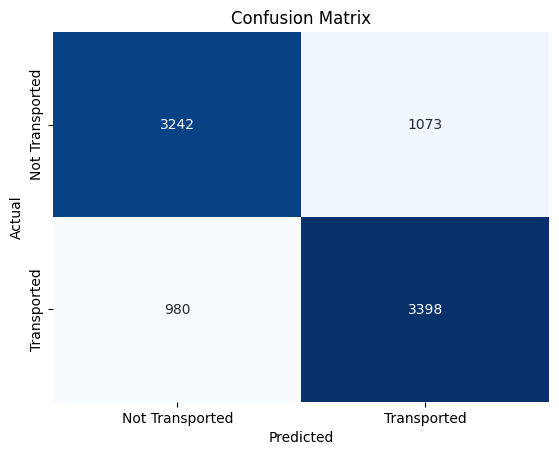

In [44]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train, knn.predict(X_train))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

54.05

In [31]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

49.64

In [32]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/Users/jchm/ml/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jchm/ml/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


50.52

In [33]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

49.64

In [34]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [35]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.99

In [37]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,100.00
2,Random Forest,99.99
0,KNN,76.38
3,Naive Bayes,54.05
6,Linear SVC,50.52
1,Logistic Regression,50.36
4,Perceptron,49.64
5,Stochastic Gradient Decent,49.64


/var/folders/4x/0fyln44x5l52yj0tn794p3t80000gn/T/ipykernel_34178/2966454566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Model', data=models.sort_values(by='Score', ascending=False), palette='viridis')


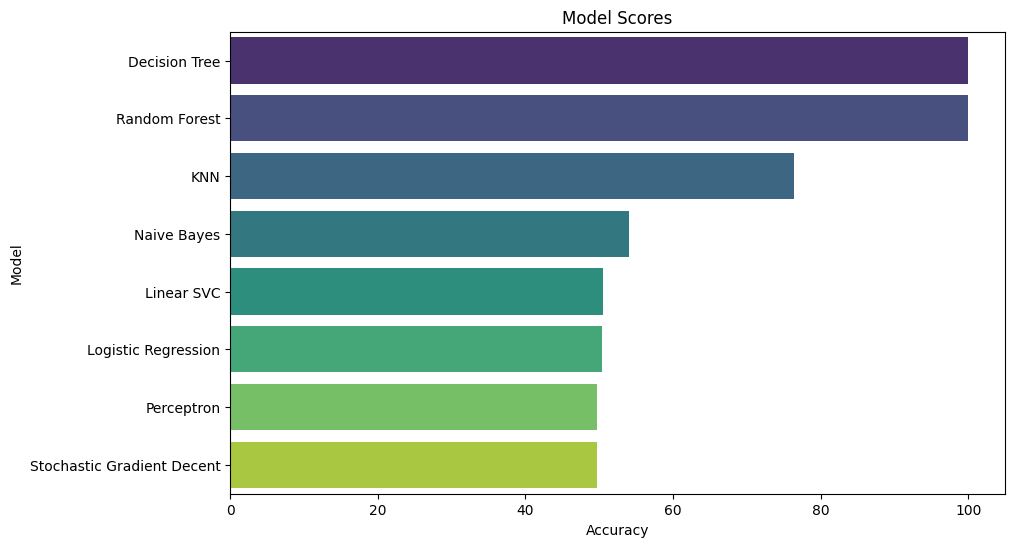

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=models.sort_values(by='Score', ascending=False), palette='viridis')
plt.title('Model Scores')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()